In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [2]:
#df=pd.read_csv("processedtrain.csv")# i have question here
df=pd.read_csv("C:/Users/Dell/Downloads/Data Science Track/Weather/datasets/clean/processedtrain.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


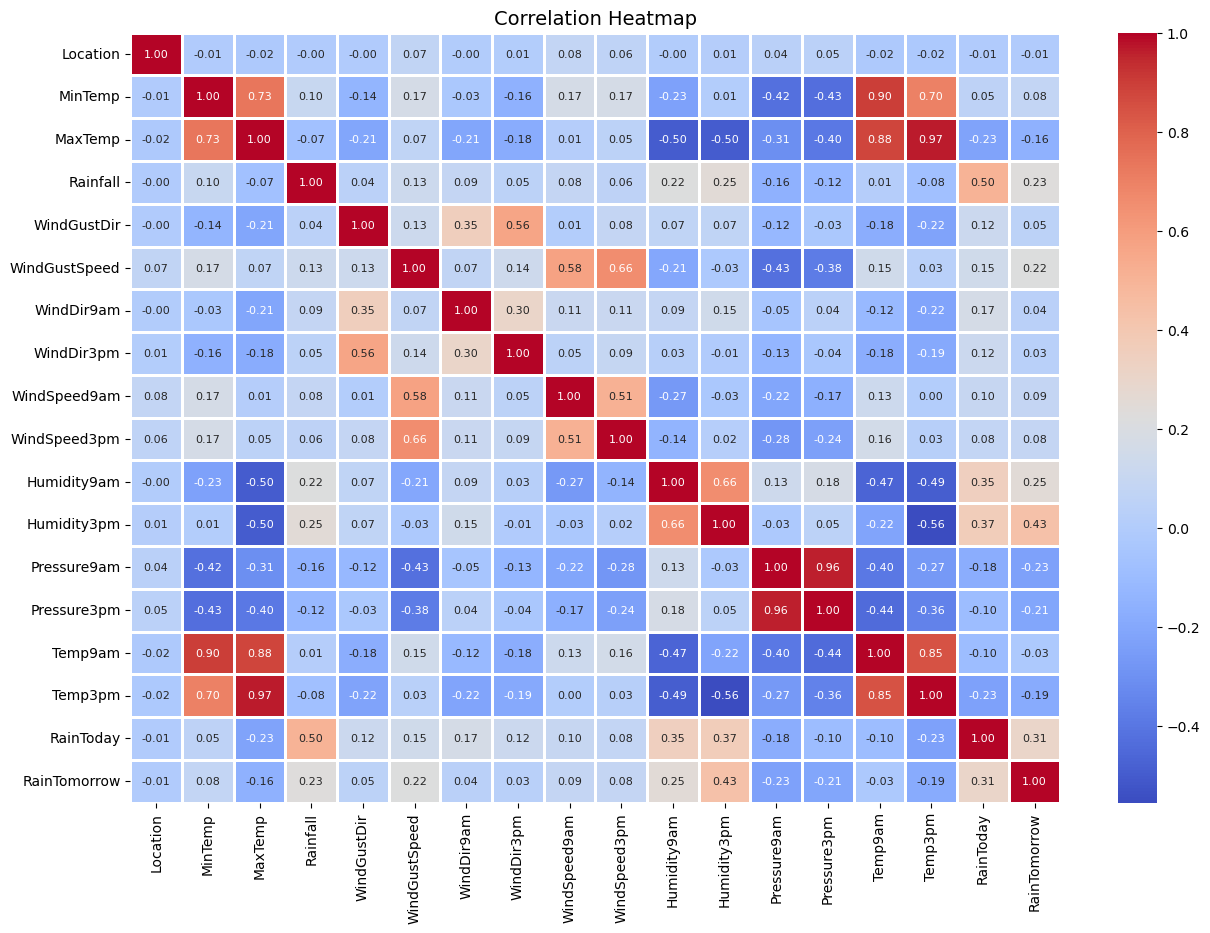

In [3]:
#heat map
numeric_data = df.drop(columns=["Date"]).select_dtypes(include=['int64', 'float64']) 
corr_matrix = numeric_data.corr()

plt.figure(figsize=(15,10))  
sns.heatmap(
    corr_matrix,
    annot=True,
    annot_kws={'size': 8},  
    fmt='.2f',
    cmap='coolwarm',
    linewidths=1,
)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


In [105]:
X=df[["MinTemp","MaxTemp","Rainfall","WindGustSpeed","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Temp9am","Temp3pm","RainToday"]]
Y=df["RainTomorrow"]

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [ ]:
model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=None,
    class_weight="balanced",  
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [108]:
y_pred = model.predict(X_test)

In [109]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8441495943902103
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     22672
           1       0.74      0.45      0.56      6420

    accuracy                           0.84     29092
   macro avg       0.80      0.70      0.73     29092
weighted avg       0.83      0.84      0.83     29092

